<a href="https://colab.research.google.com/github/Mukiti-Ryan/Credit-Card-Churn-Prediction/blob/main/Credit_Card_Churn_Prediction_(RC%2C_RFC%2C_GSCV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Load the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/credit_card_churn.csv')
df.shape

(10127, 23)

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis = 1, inplace = True)

df.shape

(10127, 21)

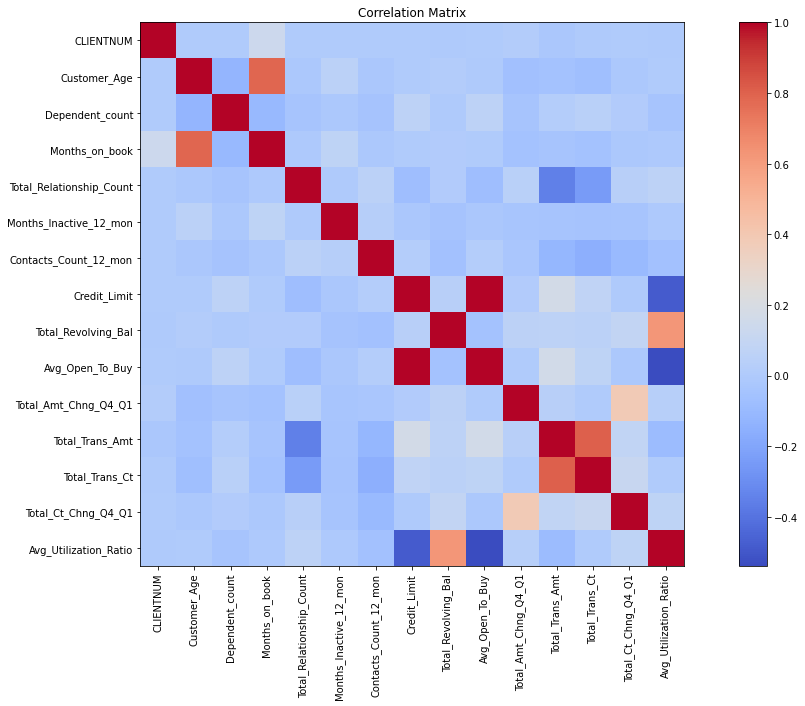

In [ ]:
 corr = df.corr()
 
 plt.figure(figsize = (20, 10))
 plt.imshow(corr, cmap = 'coolwarm', interpolation = 'none')
 plt.colorbar()
 plt.xticks(range(len(corr)), corr.columns, rotation = 90)
 plt.yticks(range(len(corr)), corr.columns)
 plt.title('Correlation Matrix')
 plt.show()

In [ ]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [ ]:
df.isna().sum().sum()

0

In [ ]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [ ]:
educationLevel_mapping = {
    # If unknown, set to -1
    'Unknown': -1,
    # Lowest level of education
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    # Highest level of education
    'Doctorate': 5,
}

df['Education_Rank'] = df['Education_Level'].map(educationLevel_mapping)

In [ ]:
cardCategory_mapping = {
    'Blue': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4,
}

df['Card_Types'] = df['Card_Category'].map(cardCategory_mapping)

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Rank,Card_Types
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,3,1
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,3,1
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,1
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [ ]:
df['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
columns = df.columns
binary_cols = []

for col in columns:
  if df[col].value_counts().shape[0] == 2:
    binary_cols.append(col)

binary_cols

['Attrition_Flag', 'Gender']

In [ ]:
multiple_cols = []

for col in df.columns:
  num_unique_vals = df[col].nunique()
  if num_unique_vals > 2:
    multiple_cols.append(col)

multiple_cols

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Education_Rank',
 'Card_Types']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


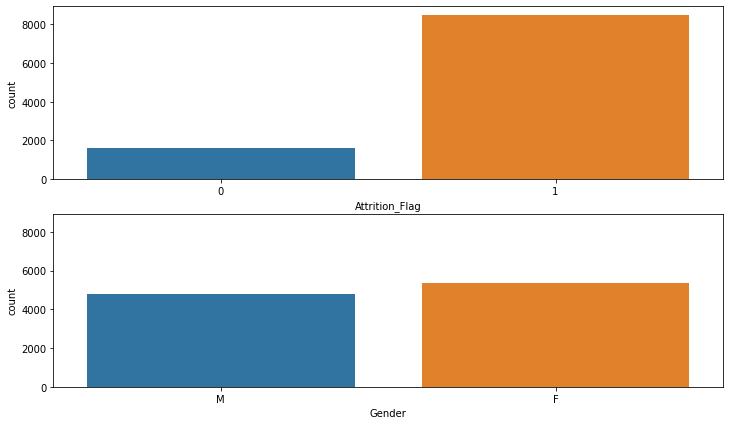

In [ ]:
fig, axes = plt.subplots(2, figsize = (12, 7), sharey = True)

sns.countplot("Attrition_Flag", data = df, ax = axes[0])
sns.countplot("Gender", data = df, ax = axes[1])

In [ ]:
df[['Gender', 'Attrition_Flag']].groupby(['Gender']).mean()

,Attrition_Flag
Gender,
F,0.826428
M,0.853848


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

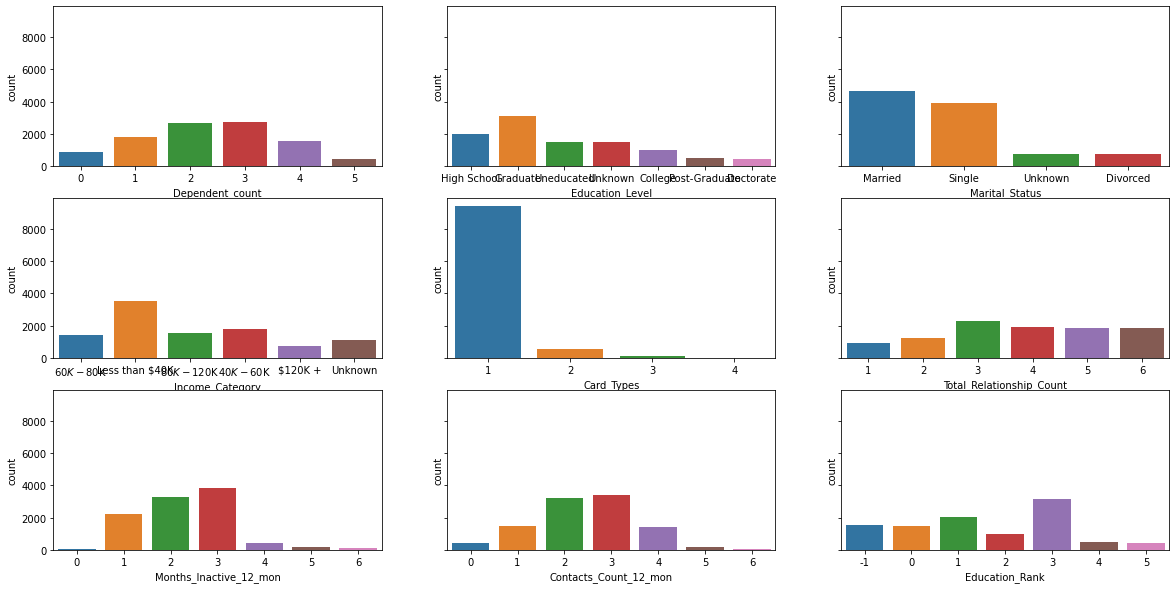

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (20, 10), sharey = True)

sns.countplot('Dependent_count', data = df, ax = axes[0, 0])
sns.countplot('Education_Level', data = df, ax = axes[0, 1])
sns.countplot('Marital_Status', data = df, ax = axes[0, 2])
sns.countplot('Income_Category', data = df, ax = axes[1, 0])
sns.countplot('Card_Types', data = df, ax = axes[1, 1])
sns.countplot('Total_Relationship_Count', data = df, ax = axes[1, 2])
sns.countplot('Months_Inactive_12_mon', data = df, ax = axes[2, 0])
sns.countplot('Contacts_Count_12_mon', data = df, ax = axes[2, 1])
sns.countplot('Education_Rank', data = df, ax = axes[2, 2])

In [ ]:
display(df[['Dependent_count', 'Attrition_Flag']].groupby(['Dependent_count']).mean(),
        df[['Education_Level', 'Attrition_Flag']].groupby(['Education_Level']).mean(),
        df[['Marital_Status', 'Attrition_Flag']].groupby(['Marital_Status']).mean(),
        df[['Income_Category', 'Attrition_Flag']].groupby(['Income_Category']).mean(),
        df[['Card_Category', 'Attrition_Flag']].groupby(['Card_Category']).mean(),
        df[['Total_Relationship_Count', 'Attrition_Flag']].groupby(['Total_Relationship_Count']).mean(),
        df[['Months_Inactive_12_mon', 'Attrition_Flag']].groupby(['Months_Inactive_12_mon']).mean(),
        df[['Contacts_Count_12_mon', 'Attrition_Flag']].groupby(['Contacts_Count_12_mon']).mean())

,Attrition_Flag
Dependent_count,
0,0.850664
1,0.853645
2,0.842938
3,0.823572
4,0.834816
5,0.849057


,Attrition_Flag
Education_Level,
College,0.847976
Doctorate,0.789357
Graduate,0.844309
High School,0.847988
Post-Graduate,0.821705
Uneducated,0.840619
Unknown,0.831468


,Attrition_Flag
Marital_Status,
Divorced,0.838235
Married,0.848731
Single,0.830586
Unknown,0.827770


,Attrition_Flag
Income_Category,
$120K +,0.826685
$40K - $60K,0.848603
$60K - $80K,0.865193
$80K - $120K,0.842345
Less than $40K,0.828138
Unknown,0.831835


,Attrition_Flag
Card_Category,
Blue,0.839021
Gold,0.818966
Platinum,0.750000
Silver,0.852252


,Attrition_Flag
Total_Relationship_Count,
1,0.743956
2,0.721641
3,0.826464
4,0.882322
5,0.879958
6,0.894962


,Attrition_Flag
Months_Inactive_12_mon,
0,0.482759
1,0.955217
2,0.846130
3,0.785231
4,0.701149
5,0.820225
6,0.846774


,Attrition_Flag
Contacts_Count_12_mon,
0,0.982456
1,0.927952
2,0.875116
3,0.798521
4,0.773707
5,0.664773
6,0.000000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

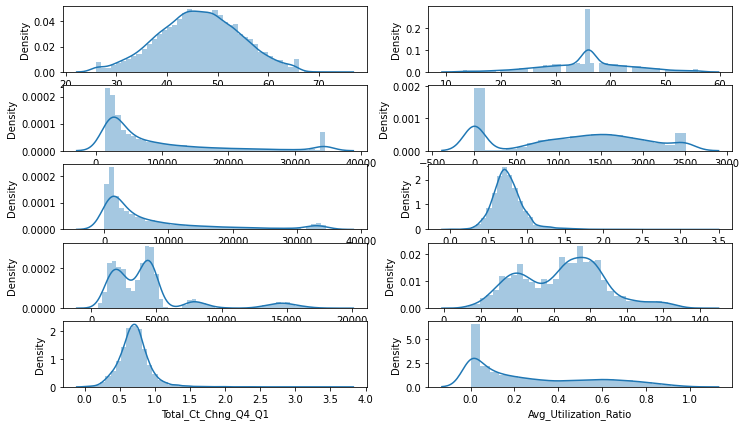

In [ ]:
fig, axes = plt.subplots(5, 2, figsize = (12, 7))

sns.distplot(df["Customer_Age"], ax = axes[0, 0])
sns.distplot(df["Months_on_book"], ax = axes[0, 1])
sns.distplot(df["Credit_Limit"], ax = axes[1, 0])
sns.distplot(df["Total_Revolving_Bal"], ax = axes[1, 1])
sns.distplot(df["Avg_Open_To_Buy"], ax = axes[2, 0])
sns.distplot(df["Total_Amt_Chng_Q4_Q1"], ax = axes[2, 1])
sns.distplot(df["Total_Trans_Amt"], ax = axes[3, 0])
sns.distplot(df["Total_Trans_Ct"], ax = axes[3, 1])
sns.distplot(df["Total_Ct_Chng_Q4_Q1"], ax = axes[4, 0])
sns.distplot(df["Avg_Utilization_Ratio"], ax = axes[4, 1])

In [ ]:
display(df[['Customer_Age', 'Attrition_Flag']].groupby(['Customer_Age']).mean(),
        df[['Months_on_book', 'Attrition_Flag']].groupby(['Months_on_book']).mean(),
        df[['Credit_Limit', 'Attrition_Flag']].groupby(['Credit_Limit']).mean(),
        df[['Total_Revolving_Bal', 'Attrition_Flag']].groupby(['Total_Revolving_Bal']).mean(),
        df[['Avg_Open_To_Buy', 'Attrition_Flag']].groupby(['Avg_Open_To_Buy']).mean(),
        df[['Total_Amt_Chng_Q4_Q1', 'Attrition_Flag']].groupby(['Total_Amt_Chng_Q4_Q1']).mean(),
        df[['Total_Trans_Amt', 'Attrition_Flag']].groupby(['Total_Trans_Amt']).mean(),
        df[['Total_Trans_Ct', 'Attrition_Flag']].groupby(['Total_Trans_Ct']).mean(),
        df[['Total_Ct_Chng_Q4_Q1', 'Attrition_Flag']].groupby(['Total_Ct_Chng_Q4_Q1']).mean(),
        df[['Avg_Utilization_Ratio', 'Attrition_Flag']].groupby(['Avg_Utilization_Ratio']).mean())

,Attrition_Flag
Customer_Age,
26,0.923077
27,0.906250
28,0.965517
29,0.875000
30,0.785714
31,0.857143
32,0.839623
33,0.842520
34,0.869863


,Attrition_Flag
Months_on_book,
13,0.900000
14,0.937500
15,0.735294
16,0.896552
17,0.897436
18,0.775862
19,0.904762
20,0.824324
21,0.879518


,Attrition_Flag
Credit_Limit,
1438.3,0.755424
1439.0,0.500000
1440.0,0.000000
1441.0,1.000000
1442.0,0.000000
...,...
34198.0,1.000000
34427.0,1.000000
34458.0,1.000000


,Attrition_Flag
Total_Revolving_Bal,
0,0.638462
132,0.000000
134,0.000000
145,0.000000
154,0.000000
...,...
2511,1.000000
2512,1.000000
2513,0.000000


,Attrition_Flag
Avg_Open_To_Buy,
3.0,0.000000
10.0,0.000000
14.0,0.000000
15.0,1.000000
24.0,0.000000
...,...
34297.0,0.000000
34300.0,0.000000
34302.0,0.000000


,Attrition_Flag
Total_Amt_Chng_Q4_Q1,
0.000,0.0
0.010,0.0
0.018,0.0
0.046,0.0
0.061,0.0
...,...
2.368,1.0
2.594,1.0
2.675,1.0


,Attrition_Flag
Total_Trans_Amt,
510,0.0
530,0.0
563,0.0
569,0.0
594,0.0
...,...
17628,1.0
17634,1.0
17744,1.0


,Attrition_Flag
Total_Trans_Ct,
10,0.000000
11,0.500000
12,0.000000
13,0.400000
14,0.111111
...,...
131,1.000000
132,1.000000
134,1.000000


,Attrition_Flag
Total_Ct_Chng_Q4_Q1,
0.000,0.0
0.028,1.0
0.029,0.0
0.038,0.0
0.053,0.0
...,...
3.000,1.0
3.250,1.0
3.500,1.0


,Attrition_Flag
Avg_Utilization_Ratio,
0.000,0.638462
0.004,0.000000
0.005,0.000000
0.006,0.000000
0.007,0.000000
...,...
0.990,0.000000
0.992,0.000000
0.994,1.000000


**VARIABLE SELECTION**
---
After exploring the variables, I have decided not to use the following variables because they add little or no informative power to the model.

1. CLIENTNUM
2. Customer_Age
3. Gender
4. Dependent_count
5. Marital_Status
6. Income_Category
7. Months_on_book

In [ ]:
df.drop(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count', 'Marital_Status',
         'Income_Category', 'Months_on_book', 'Education_Level', 'Card_Category'],
        axis = 1, inplace = True)

df.shape

(10127, 14)

In [ ]:
df.head()

,Attrition_Flag,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Rank,Card_Types
0,1,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,1
1,1,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,3,1
2,1,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,3,1
3,1,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,1
4,1,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [ ]:
X = pd.get_dummies(df, drop_first = True)

In [ ]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['Education_Rank']])
b = sc.fit_transform(df[['Card_Types']])
c = sc.fit_transform(df[['Total_Relationship_Count']])
d = sc.fit_transform(df[['Months_Inactive_12_mon']])
e = sc.fit_transform(df[['Credit_Limit']])
f = sc.fit_transform(df[['Total_Revolving_Bal']])
g = sc.fit_transform(df[['Avg_Open_To_Buy']])
h = sc.fit_transform(df[['Total_Amt_Chng_Q4_Q1']])
i = sc.fit_transform(df[['Total_Trans_Amt']])
j = sc.fit_transform(df[['Total_Trans_Ct']])
k = sc.fit_transform(df[['Total_Ct_Chng_Q4_Q1']])

X['Education_Rank'] = a
X['Card_Types'] = b
X['Total_Relationship_Count'] = c
X['Months_Inactive_12_mon'] = d
X['Credit_Limit'] = e
X['Total_Revolving_Bal'] = f
X['Avg_Open_To_Buy'] = g
X['Total_Amt_Chng_Q4_Q1'] = h
X['Total_Trans_Amt'] = i
X['Total_Trans_Ct'] = j
X['Total_Ct_Chng_Q4_Q1'] = k

In [ ]:
X.shape

(10127, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

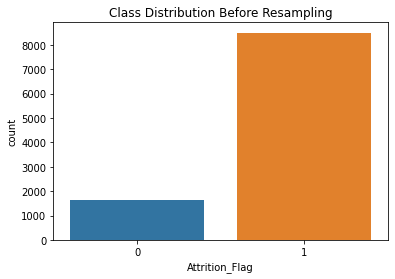

In [ ]:
sns.countplot('Attrition_Flag', data = df).set_title('Class Distribution Before Resampling')

In [ ]:
X_yes = X[X.Attrition_Flag == 0]
X_no = X[X.Attrition_Flag == 1]

In [ ]:
X_yes_upsampled = X_yes.sample(n = len(X_no), replace = True, random_state = 42)

print(len(X_yes_upsampled))

8500


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

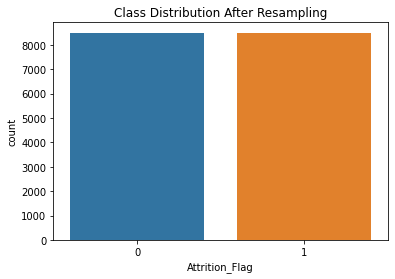

In [ ]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop = True)

sns.countplot('Attrition_Flag', data = X_upsampled).set_title('Class Distribution After Resampling')

In [ ]:
X = X_upsampled.drop(['Attrition_Flag'], axis = 1)

y = X_upsampled['Attrition_Flag']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
clf_ridge = RidgeClassifier()
clf_ridge.fit(X_train, y_train)

RidgeClassifier()

In [ ]:
pred = clf_ridge.predict(X_train)

accuracy_score(y_train, pred)

0.8466911764705882

In [ ]:
pred_test = clf_ridge.predict(X_test)

accuracy_score(y_test, pred_test)

0.8379411764705882

In [ ]:
clf_forest = RandomForestClassifier(n_estimators = 100, max_depth = 10)

clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
pred = clf_forest.predict(X_train)

accuracy_score(y_train, pred)

0.9838970588235294

In [ ]:
pred_test = clf_forest.predict(X_test)

accuracy_score(y_test, pred_test)

0.9738235294117648

In [ ]:
parameters = {'n_estimators': [250, 300, 350, 400], 'max_depth': [20, 25, 30, 35]}

forest = RandomForestClassifier()

clf = GridSearchCV(estimator = forest, param_grid = parameters, n_jobs = -1, cv = 5)

In [ ]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'n_estimators': [250, 300, 350, 400]})

In [ ]:
clf.best_params_

{'max_depth': 30, 'n_estimators': 400}

In [ ]:
clf.best_score_

0.9045882352941176